# Importing Libiraries

In [189]:
# Import data manipulation libraries
import pandas as pd

# Import the actual data
from sklearn.datasets import load_iris

# Import visualization library like matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import metrics for accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm

from sklearn import tree
import seaborn as sns

# Import machine learning libraries
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression



# Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

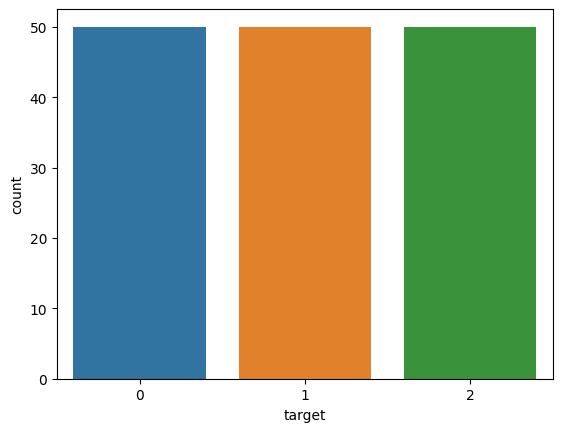

In [190]:
# Load the Wine dataset
iris = load_iris()
X, y = iris.data, iris.target
# Create a DataFrame for easier exploration
feature_names = iris.feature_names
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y

# Display basic information about the dataset
print(df.info())

# Display summary statistics of the features
print(df.describe())

# Draw histogram of the target variable
sns.countplot(x='target', data=df)
plt.show()

# KNN

In [191]:
# Load the Wine dataset
iris = load_iris()
X_original, y_original = iris.data, iris.target

In [192]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3,stratify= y_original) # Stratify=y_original to stratify the split

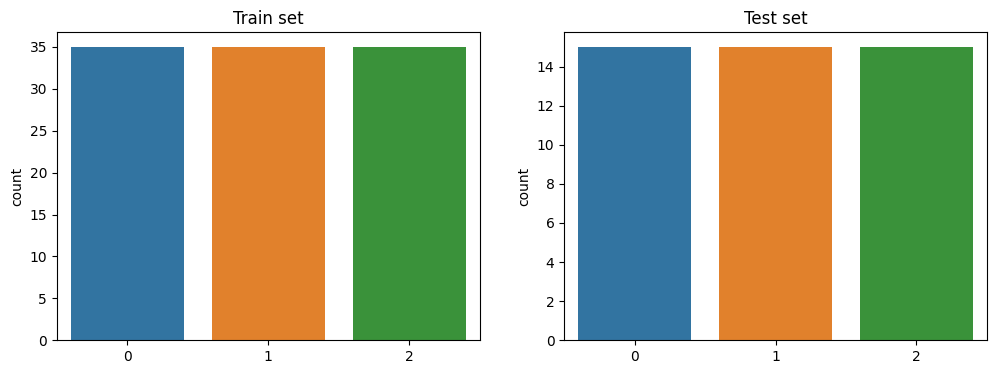

In [193]:
# Draw histogram of the target in train and test sets
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Test set')
plt.show()

In [194]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
classifier = KNeighborsClassifier(n_neighbors=3)      # K is set to 3
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy=classifier.score(X_test,y_test) * (100)
print(f'K-Nearest Neighbors: {accuracy:.2f}' ,end="" )
print("%")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

K-Nearest Neighbors: 93.33%
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.88      0.93      0.90        15
           2       0.93      0.93      0.93        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[14  1  0]
 [ 0 14  1]
 [ 0  1 14]]


# Kmeans

In [196]:
iris_data=sns.load_dataset("iris") #loading the iris dataset
le = LabelEncoder()
le.fit(iris_data['species'])
print(list(le.classes_))
iris_data['species'] = le.transform(iris_data['species'])

['setosa', 'versicolor', 'virginica']


In [197]:
iris_matrix = pd.DataFrame.to_numpy(iris_data[['sepal_length','sepal_width','petal_length','petal_width']])

In [198]:
k=3
cluster_model = KMeans(n_clusters=k, random_state=10)


In [199]:
cluster_model.fit(iris_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [200]:
cluster_labels = cluster_model.fit_predict(iris_matrix)
kmeans=iris_data # assiging iris to kmeans variableb


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [201]:
kmeans['pred'] = cluster_labels #adding another column to predict label and assign it k-Means model
sm.accuracy_score(iris_data.species, cluster_model.labels_)


0.8933333333333333

In [202]:
pd.crosstab(iris_data.species, cluster_model.labels_)

col_0,0,1,2
species,,,
0,50,0,0
1,0,48,2
2,0,14,36


In [203]:
print(classification_report(iris_data.species, cluster_model.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

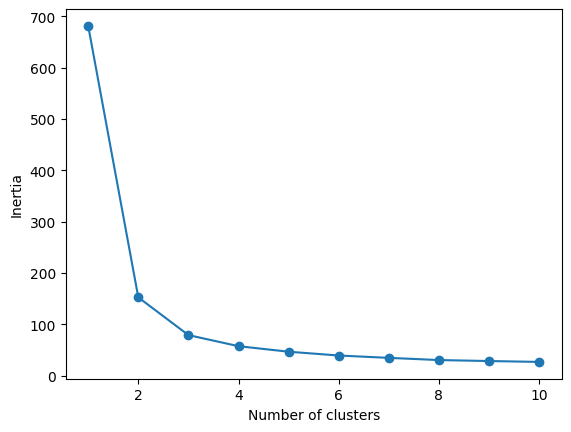

In [204]:
# Add elbow method to find the optimal number of clusters
inertias = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(iris_matrix)
    inertias.append(kmeans.inertia_)

# Display the elbow plot
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Logistic Regression with decision bounding


In [205]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = (iris.target == 0).astype(int)

# create a logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

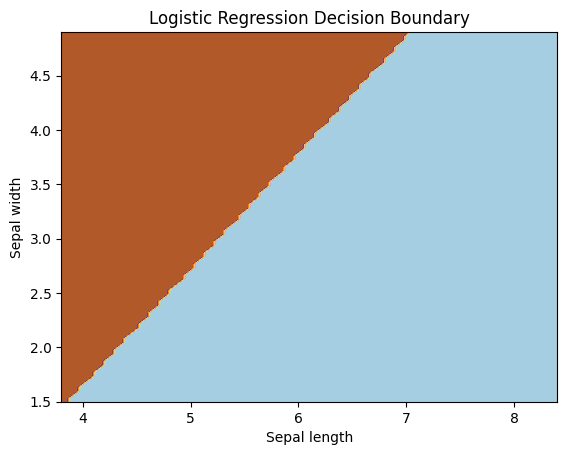

In [206]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [207]:
# create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy=model.score(X_test,y_test)*100
print(f'Logistic Regression accuracy: {accuracy:.2f}' ,end="" )
print("%")

Logistic Regression accuracy: 95.56%


In [208]:
predicted=model.predict(X_test)
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


# Linear Regression

In [209]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)

In [210]:
predicted=model.predict(X_test)
print(100*metrics.r2_score(y_test,predicted))

80.16419708317706


In [211]:
print ('MAE:', metrics.mean_absolute_error(y_test, predicted))
print ('MSE:', metrics.mean_squared_error(y_test, predicted))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 0.1754680463889626
MSE: 0.04897729115264925
RMSE: 0.22130813620978612


# Notes

The Iris dataset is relatively small and well-structured, with a clear separation between classes. Logistic regression is a linear classifier that works well when there is a linear relationship between the features and the target variable. In this case, logistic regression can effectively separate the positive class (setosa) from the negative class using a linear decision boundary.


Logistic regression is applied using only the first two features of the Iris dataset (sepal length and sepal width). By selecting these two features, the code focuses on the most discriminative features for the binary classification task.

If the classes in the Iris dataset can be effectively separated by a linear decision boundary, logistic regression can perform well. KNN and K-Means clustering do not make strong assumptions about linearity and can be more flexible in capturing complex relationships.

With different datasets, other models such as KNN, K-Means clustering, or even more complex algorithms could potentially achieve higher accuracy or better performance.